In [ ]:
np.std(x)

In [ ]:
from raster import raster
# INPUTS
# fileloc = location of point cloud
# saveloc = folder for outputs
# mask = denotes whether file is a mask image. mask = 1 skips rasterisation step and resizes to match image dimensions.
# res = multiplier on resolution of rasterised point cloud imagedimension = defaultdimension*res
# dim = if given, resulting image is cropped into dimxdim images and put into relevant mask or image folder ready for network training. 

# INPUT FILES
# if mask = 0, pointcloud or .tiff format image at location: fileloc
# if mask = 1, mask at location: saveloc+"mask.tiff" 
# if mask = 1, image at location: saveloc+ "raster.tiff"

# OUTPUTS
# noim = number of images created

# OUTPUT FILES
# if mask = 0 and input is point cloud, rastered image at location: saveloc+ "raster.tiff"
# if mask = 0 and input is an image, rastered image at location: saveloc+ "raster.tiff"
# if mask = 1, resized mask at location: saveloc+"mask.tiff"
# if dim exists and mask = 0, new folder (if not exists): 'croppedimages/'
# if dim exists and mask = 1, new folder (if not exists): 'croppedmasks/'
# if dim exists and mask = 0, numbered image crops of size dimxdim at location: saveloc+croppedimages/+ str(i) +".tiff"
# if dim exists and mask = 1, numbered mask crops of size dimxdim at location: saveloc+croppedmasks/+ str(i) +".tiff"
fileloc = "../../Incoming data/MartyrWorthy_3mm-flat - Cloud.las"
saveloc = "../dataprep/"
mask = 0
res = 1
dim = None
raster(fileloc,saveloc)

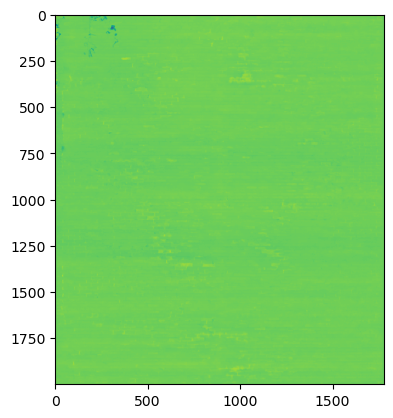

In [2]:
import cv2 as cv
import matplotlib.pyplot as plt

from PIL import Image
import numpy as np

#im = Image.open("../data/synth/synthetic_defect_wall3.tiff")
im = Image.open("../dataprep/raster.tiff")
imnp = np.array(im)
#im = cv.imread("synth/synthetic_defect_wall4.tiff")
plt.imshow(imnp[1000:3000,:])

In [15]:
dim = 500
pic = im
#pic = ImageOps.grayscale(pic)
w = pic.size[0]
nx = int(w/dim)
h = pic.size[1]
ny = int(h/dim)
i = 0
print("cropping masks")
for x in range(0, nx):
    for y in range(0, ny):
      i = i+1
      box = (x*dim, y*dim, dim*(1+x) , dim*(1+y))
      region = pic.crop(box)
      #region.save("test2/croppedimagestargetfullres2/"+ str(i) +".png")
      region.save("../dataprep/crops/"+ str(i) +".tiff")
      regionnp = np.array(region)
      import matplotlib.pyplot as plt

    # Get the color map by name:
      cm = plt.get_cmap('gist_rainbow')
      regionnp = (regionnp-regionnp.min())/(regionnp.max()-regionnp.min())
      sd = np.std(regionnp)
      regionnp[regionnp > 8*sd+np.median(regionnp)] = 8*sd+np.median(regionnp)
      print(sd)
      print(np.max(regionnp)-np.min(regionnp))  
      regionnp[regionnp < np.median(regionnp)-8*sd] = np.median(regionnp)-8*sd
      regionnp = (regionnp-regionnp.min())/(regionnp.max()-regionnp.min())
    # Apply the colormap like a function to any array:
      #colored_image = cm(regionnp)

    # Obtain a 4-channel image (R,G,B,A) in float [0, 1]
    # But we want to convert to RGB in uint8 and save it:
     # Image.fromarray((colored_image[:, :, :3] * 255).astype(np.uint8)).save("../dataprep/crops/"+ str(i) +".png")
      Image.fromarray((regionnp * 255).astype(np.uint8)).save("../dataprep/crops/"+ str(i) +".png")
    

cropping masks
0.06955227
1.0
0.07923069
1.0
0.027106188
1.0
0.034644067
0.69487405
0.042995423
0.6358089
0.025356043
0.5004674
0.11057558
1.0
0.048834845
1.0
0.14072084
1.0
0.038372032
0.8528096
0.064061485
0.999334
0.04782218
0.74754095
0.06683292
0.8883219
0.24399333
1.0
0.02797626
0.9196864
0.23126632
1.0
0.078780405
0.9850819
0.062319446
1.0
0.059976257
0.8944442
0.068135604
0.81070983
0.25447363
1.0


In [51]:

im2 = Image.open("../dataprep/crops/4mask.png")
im = Image.open("../dataprep/crops/4.png")

source = im2.split()

R, G, B = 0, 1, 2


maskG = source[R].point(lambda i: i > 200 )


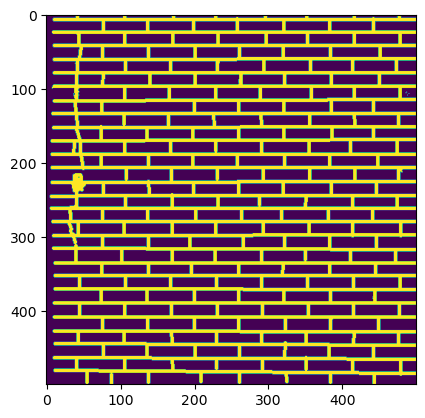

In [52]:
plt.imshow(maskG)

In [53]:
im.paste(maskG, None, None)


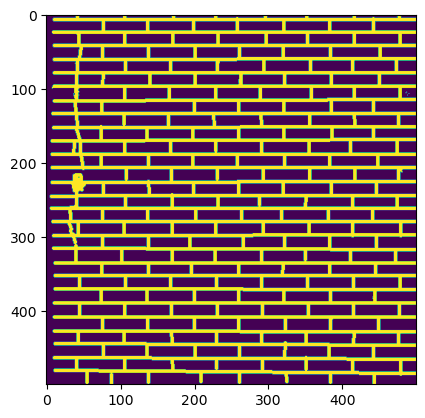

In [54]:
plt.imshow(im)

In [ ]:
im.save("../dataprep/crops/4mask.png")